**YouTube Streamers Analysis**

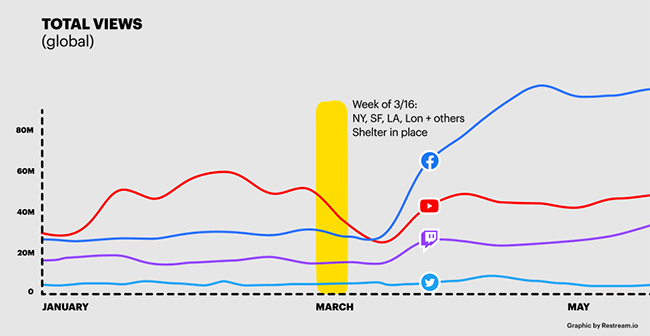

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

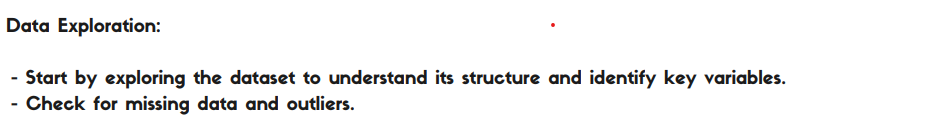

In [ ]:
# Creating data frame
# Try decoding the file with different codecs
possible_codecs = ['utf-8', 'latin-1', 'cp1252']
for codec in possible_codecs:
    try:
        df = pd.read_csv("/content/youtubers_df.csv", encoding=codec)
        print(f"File decoded successfully with {codec} encoding.")
        break
    except UnicodeDecodeError:
        print(f"Failed to decode with {codec} encoding.")

# If none of the codecs work, raise an error
else:
    raise ValueError("Unable to decode the file with any of the specified encodings.")

# Now df contains your DataFrame with the data from the CSV file, encoding='utf-8', latin = "")

File decoded successfully with utf-8 encoding.


In [ ]:
df.head(10)

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


In [ ]:
df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [ ]:
##CHECKING FOR EMPTY DATA SET/NULL ENTRY
df.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [ ]:
# Check for duplicate rows
duplicates = df[df.duplicated()]

if duplicates.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows:")
    print(duplicates)

No duplicate rows found.


In [ ]:
##DATA INSPECTION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [ ]:
print(df["Categories"])

0           Música y baile
1       Videojuegos, Humor
2                Educación
3                      NaN
4      Animación, Juguetes
              ...         
995                    NaN
996                    NaN
997         Música y baile
998                    NaN
999    Noticias y Política
Name: Categories, Length: 1000, dtype: object


In [ ]:
# Fill NaN values in the "Duration" column with the specified string
df["Categories"].fillna("Other", inplace=True)

# Now, explicitly cast the "Duration" column to a string data type
df["Categories"] = df["Categories"].astype(str)

In [ ]:
print(df["Categories"])

0           Música y baile
1       Videojuegos, Humor
2                Educación
3                    Other
4      Animación, Juguetes
              ...         
995                  Other
996                  Other
997         Música y baile
998                  Other
999    Noticias y Política
Name: Categories, Length: 1000, dtype: object


In [ ]:
##DATA INSPECTION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  1000 non-null   object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [ ]:

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Convert DataFrame to NumPy array
data_array = df[numerical_columns].values

# Convert data array to numeric type
data_array = np.array(data_array, dtype=np.float64)

# Calculate quartiles using numpy
Q1 = np.percentile(data_array, 25, axis=0)
Q3 = np.percentile(data_array, 75, axis=0)
IQR = Q3 - Q1

# Calculate potential outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using NumPy
outliers = (data_array < lower_bound) | (data_array > upper_bound)

# Display outliers
for i, column in enumerate(df[numerical_columns].columns):
    column_outliers = df[outliers[:, i]]
    if not column_outliers.empty:
        print(f"Outliers in '{column}':")
        print(column_outliers)


Outliers in 'Suscribers':
    Rank         Username           Categories   Suscribers         Country  \
0      1          tseries       Música y baile  249500000.0           India   
1      2          MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2      3        CoComelon            Educación  165500000.0         Unknown   
3      4         SETIndia                Other  162600000.0           India   
4      5    KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   
..   ...              ...                  ...          ...             ...   
74    75       gr6explode       Música y baile   39300000.0          Brasil   
75    76             TEDx                Other   39100000.0  Estados Unidos   
76    77  GaaneSuneAnsune       Música y baile   39100000.0           India   
77    78           shfa-1        Vlogs diarios   39100000.0         Francia   
78    79      vladvaniki1     Películas, Humor   38700000.0         Unknown   

         Visits      Like

In [ ]:
df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


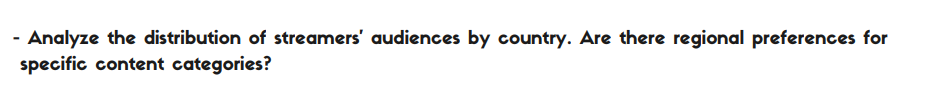

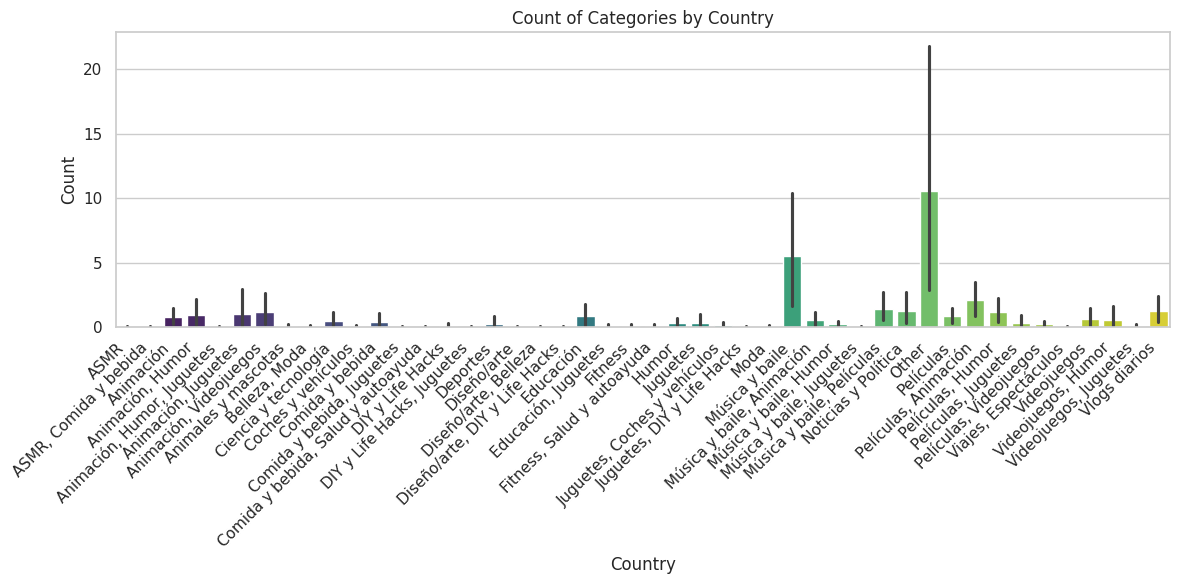

In [ ]:
# Assuming 'df' is your DataFrame with columns 'Country' and 'Categories'

# Calculate the count of each category for each country
category_country_counts = df.groupby(['Country', 'Categories']).size().unstack(fill_value=0)

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=category_country_counts, palette='viridis')
plt.title('Count of Categories by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


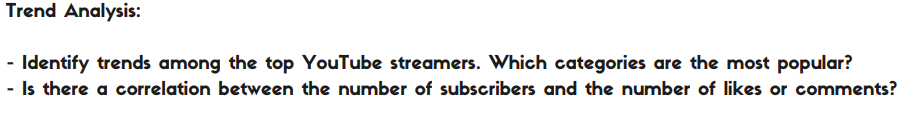

Descriptive Statistics:
              Rank    Suscribers        Visits         Likes       Comments
count  1000.000000  1.000000e+03  1.000000e+03  1.000000e+03    1000.000000
mean    500.500000  2.189440e+07  1.209446e+06  5.363259e+04    1288.768000
std     288.819436  1.682775e+07  5.229942e+06  2.580457e+05    6778.188308
min       1.000000  1.170000e+07  0.000000e+00  0.000000e+00       0.000000
25%     250.750000  1.380000e+07  3.197500e+04  4.717500e+02       2.000000
50%     500.500000  1.675000e+07  1.744500e+05  3.500000e+03      67.000000
75%     750.250000  2.370000e+07  8.654750e+05  2.865000e+04     472.000000
max    1000.000000  2.495000e+08  1.174000e+08  5.300000e+06  154000.000000


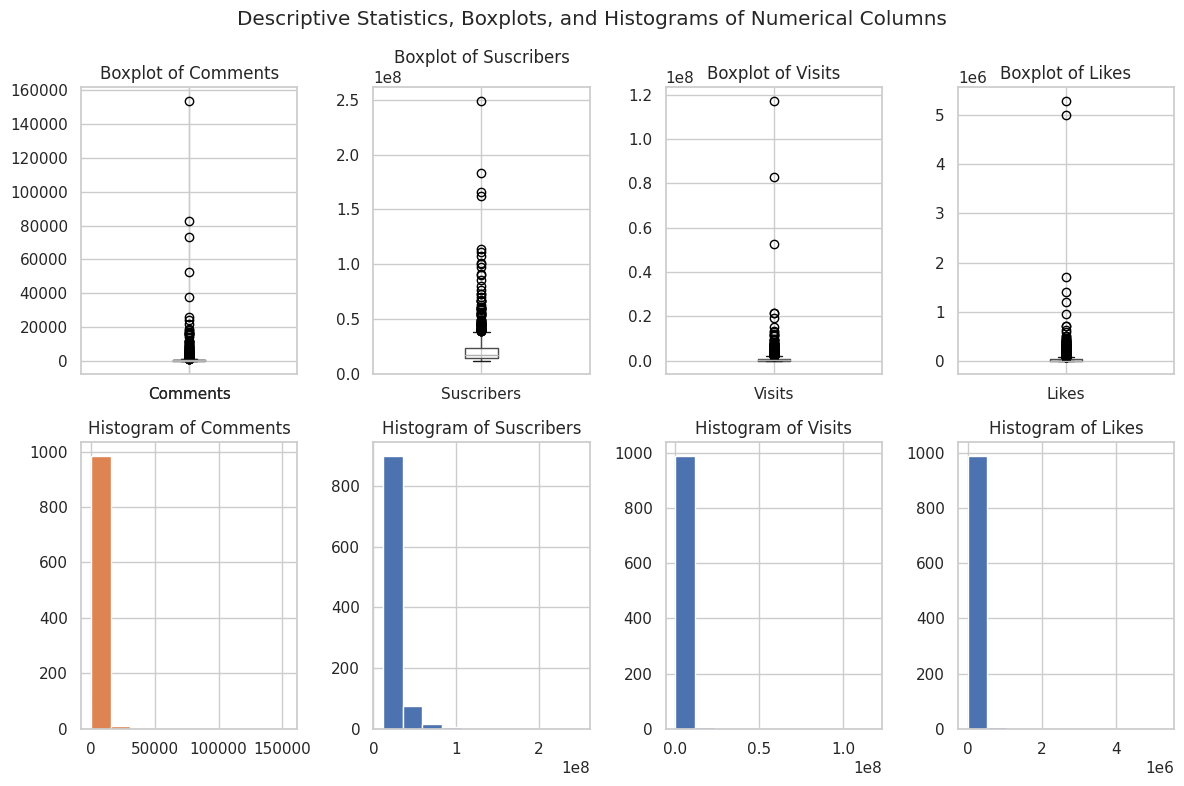

In [ ]:
# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

# Create subplots for boxplots and histograms
fig, axes = plt.subplots(nrows=2, ncols=df.shape[1] // 2, figsize=(12, 8))
fig.suptitle('Descriptive Statistics, Boxplots, and Histograms of Numerical Columns')

# Boxplots
for i, column in enumerate(df.select_dtypes(include='number')):
    df.boxplot(column, ax=axes[0, i % (df.shape[1] // 2)])
    axes[0, i % (df.shape[1] // 2)].set_title(f'Boxplot of {column}')

# Histograms
for i, column in enumerate(df.select_dtypes(include='number')):
    df.hist(column, ax=axes[1, i % (df.shape[1] // 2)])
    axes[1, i % (df.shape[1] // 2)].set_title(f'Histogram of {column}')

# Adjust layout
plt.tight_layout()
plt.show()


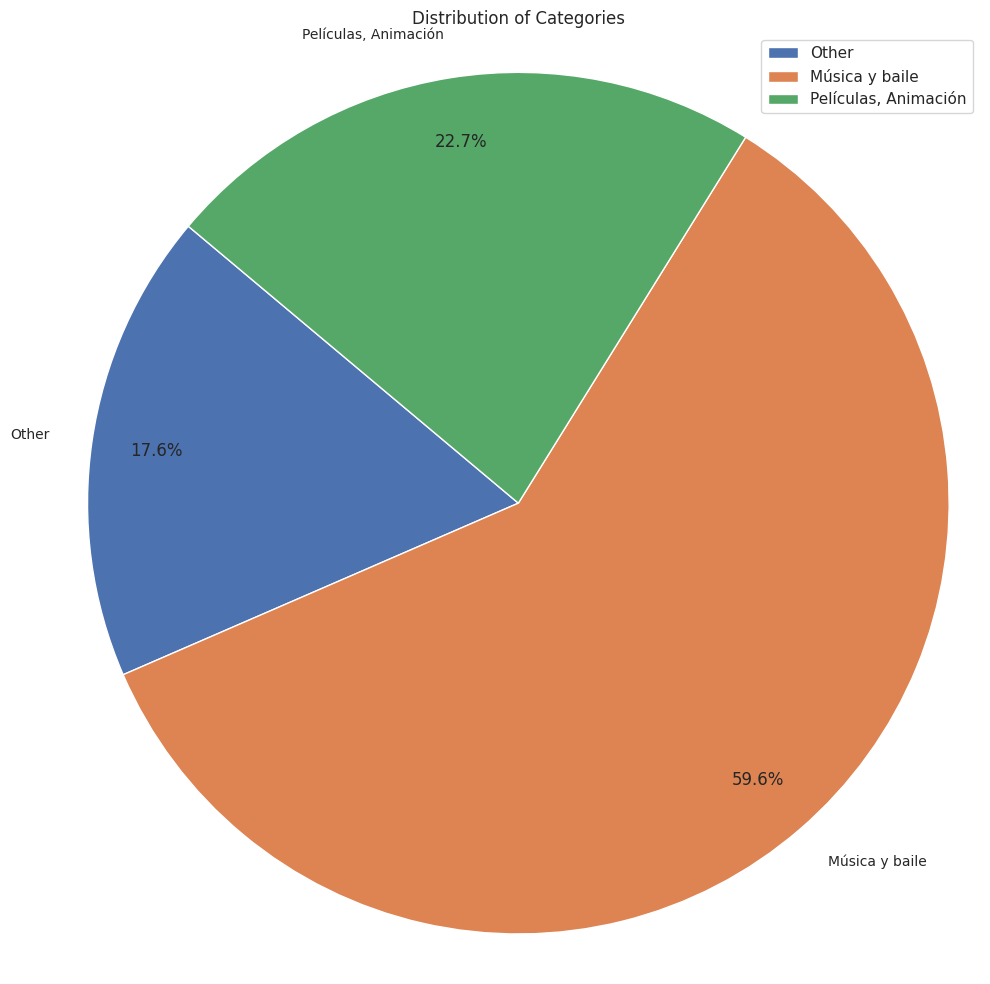

In [ ]:

# Count the occurrences of each category
category_counts = df['Categories'].value_counts()

# Threshold for annotation (considering categories with counts above 5%)
threshold = 0.05
significant_categories = category_counts[category_counts / category_counts.sum() > threshold]

# Calculate percentage for each category
other_percentage = 100 - significant_categories.sum() * 100 / category_counts.sum()

# Append 'Other' category
significant_categories['Other'] = other_percentage

# Plot the pie chart
plt.figure(figsize=(10, 10))
patches, texts, _ = plt.pie(significant_categories, labels=significant_categories.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Distribution of Categories')

# Adjust layout
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(patches, significant_categories.index, loc="best")
plt.tight_layout()

# Annotate only significant portions
for text in texts:
    text.set_fontsize(10)

plt.show()


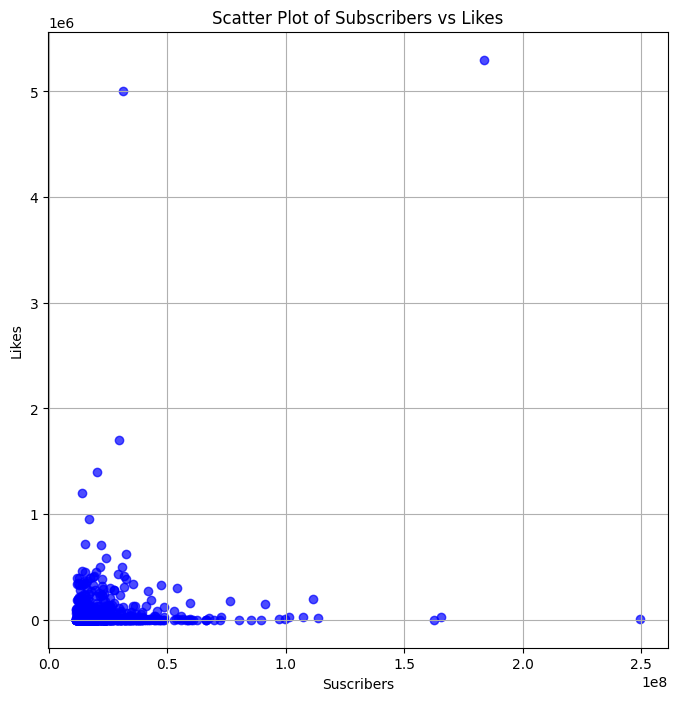

In [ ]:
# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(df['Suscribers'], df['Likes'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Subscribers vs Likes')
plt.xlabel('Suscribers')
plt.ylabel('Likes')
plt.grid(True)
plt.show()

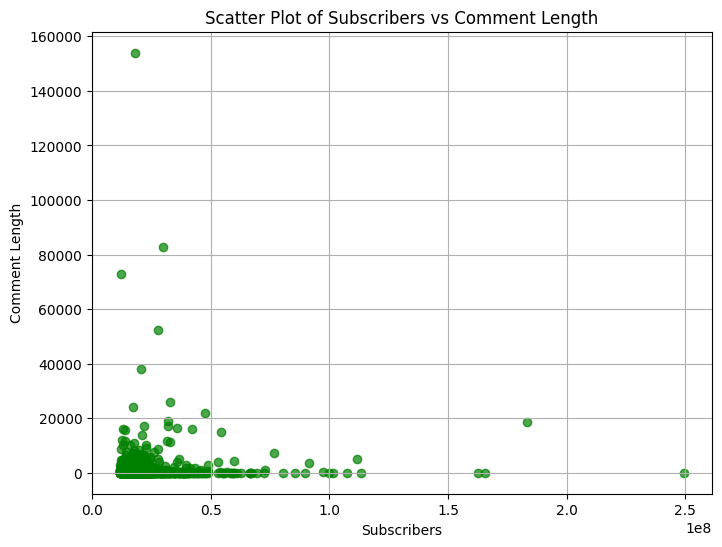

In [ ]:
# Convert comments to numerical values (length of comment strings)
#df['Comment Length'] = df['Comments'].apply(lambda x: len(x))

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df['Suscribers'], df['Comments'], color='green', alpha=0.7)
plt.title('Scatter Plot of Subscribers vs Comment Length')
plt.xlabel('Subscribers')
plt.ylabel('Comment Length')
plt.grid(True)
plt.show()

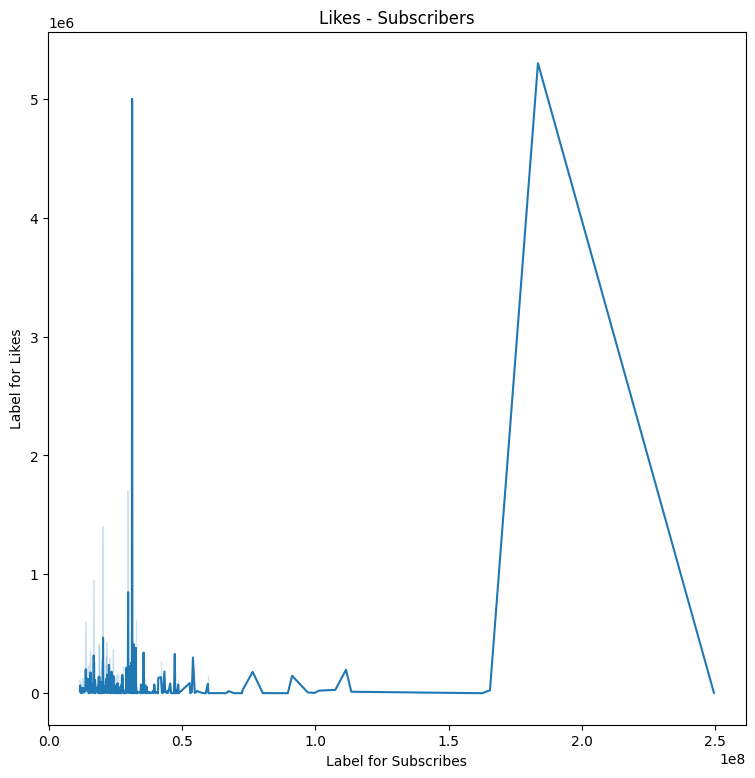

In [ ]:
# Plotting using seaborn
plt.figure(figsize=(9, 9))
sns.lineplot(data=df, y='Likes', x='Suscribers')
plt.ylabel('Label for Likes')
plt.xlabel('Label for Subscribes')
plt.title('Likes - Subscribers')
plt.show()

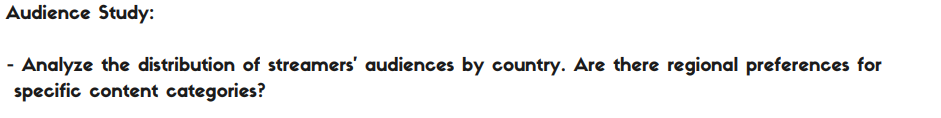

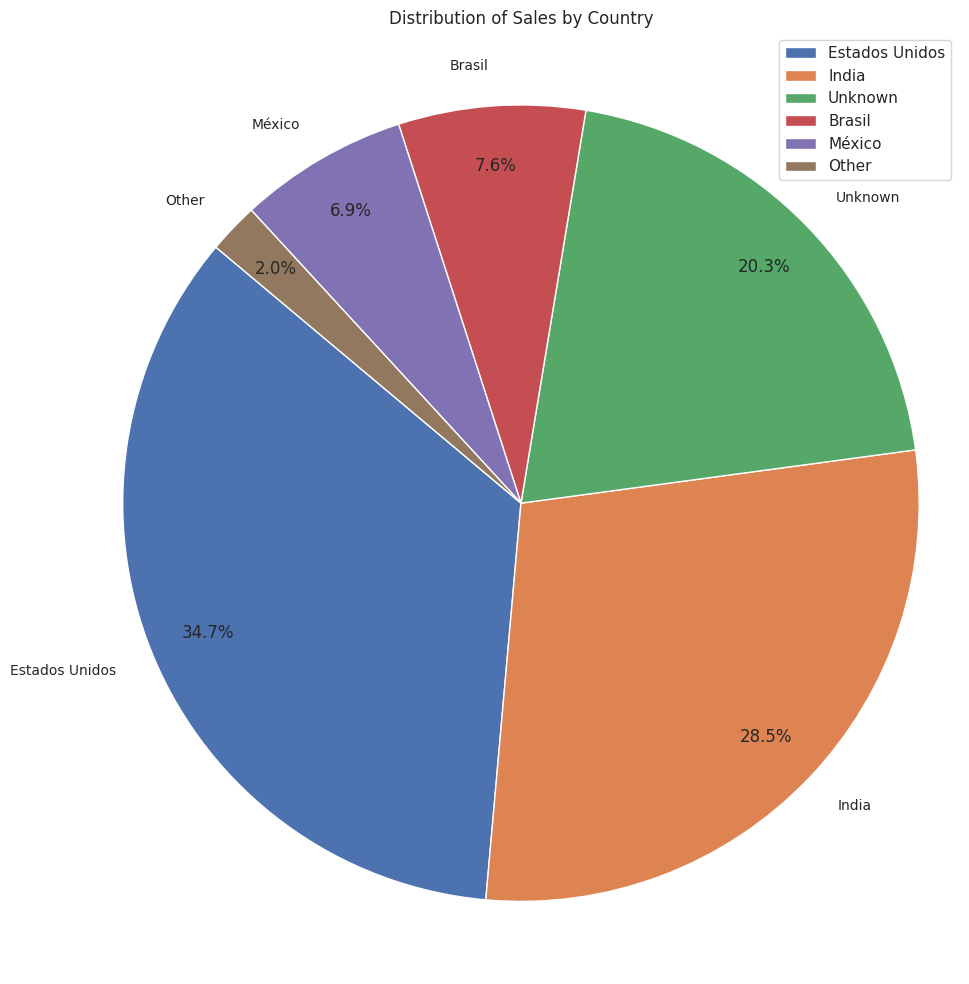

In [ ]:


# Count the occurrences of each country
country_counts = df['Country'].value_counts()

# Threshold for annotation (considering genres with counts above 5%)
threshold = 0.05
significant_genres = country_counts[country_counts / country_counts.sum() > threshold]

# Calculate percentage for each genre
other_percentage = 100 - significant_genres.sum() * 100 / country_counts.sum()

# Append 'Other' category
significant_genres['Other'] = other_percentage

# Plot the pie chart
plt.figure(figsize=(10, 10))
patches, texts, _ = plt.pie(significant_genres, labels=significant_genres.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Distribution of Sales by Country')

# Adjust layout
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(patches, significant_genres.index, loc="best")
plt.tight_layout()

# Annotate only significant portions
for text in texts:
    text.set_fontsize(10)

plt.show()


In [ ]:
df.head(12)

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Other,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


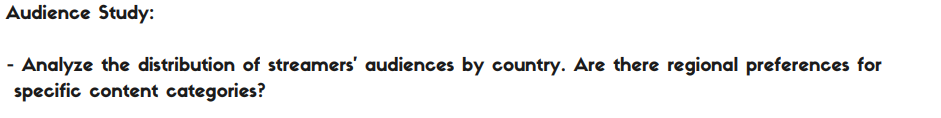

In [ ]:
print(" Average for Subscribers:  ",df['Suscribers'].mean())
print(" Average for Visits:  ",df['Visits'].mean())
print(" Average for Likes:  ",df['Likes'].mean())
print(" Average for Comments:  ",df['Comments'].mean())

 Average for Subscribers:   21894400.0
 Average for Visits:   1209446.3155
 Average for Likes:   53632.592
 Average for Comments:   1288.768


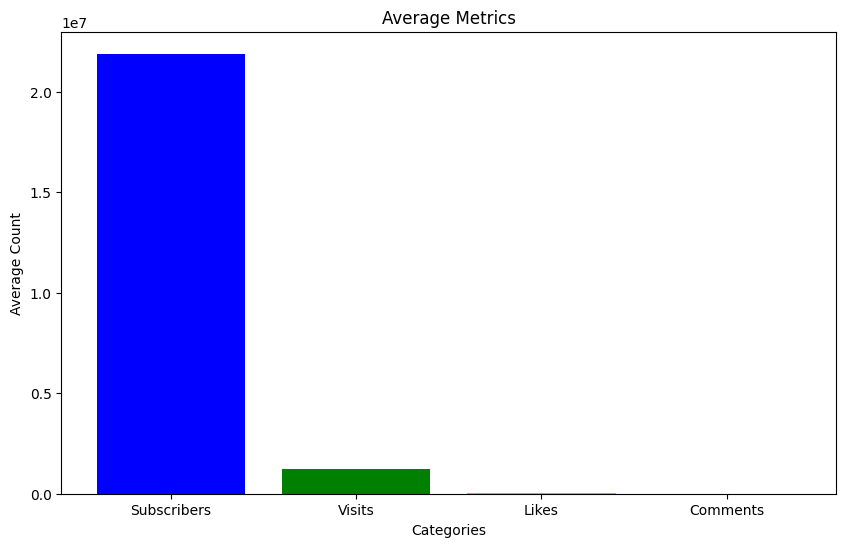

In [ ]:

# Assuming 'df' is your DataFrame
subscriber_avg = df['Suscribers'].mean()
visits_avg = df['Visits'].mean()
likes_avg = df['Likes'].mean()
comments_avg = df['Comments'].mean()

# Data
categories = ['Subscribers', 'Visits', 'Likes', 'Comments']
averages = [subscriber_avg, visits_avg, likes_avg, comments_avg]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(categories, averages, color=['blue', 'green', 'orange', 'red'])
plt.title('Average Metrics')
plt.xlabel('Categories')
plt.ylabel('Average Count')
plt.show()

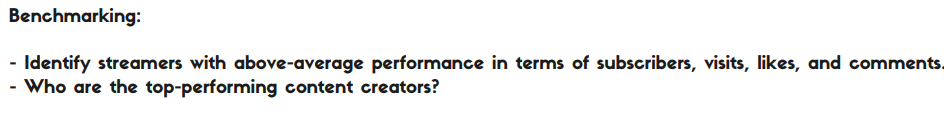

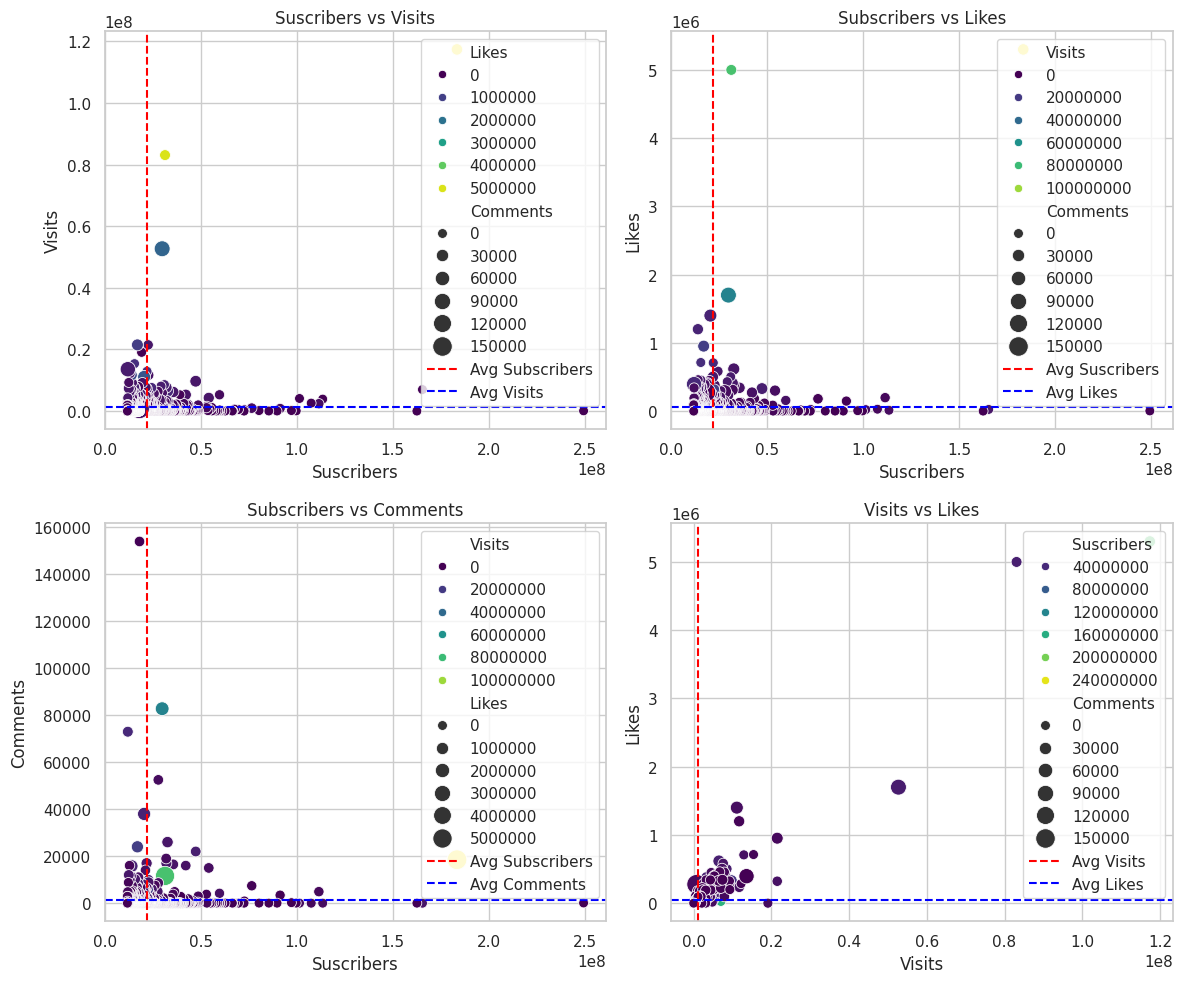

In [ ]:
# Assuming 'df' is your DataFrame containing streamer data
# Calculate average metrics
subscriber_avg = df['Suscribers'].mean()
visits_avg = df['Visits'].mean()
likes_avg = df['Likes'].mean()
comments_avg = df['Comments'].mean()

# Set up figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Subscribers vs Visits
sns.scatterplot(data=df, x='Suscribers', y='Visits', hue='Likes', size='Comments', sizes=(50, 200), palette='viridis', ax=axes[0, 0])
axes[0, 0].axvline(subscriber_avg, color='red', linestyle='--', label='Avg Subscribers')
axes[0, 0].axhline(visits_avg, color='blue', linestyle='--', label='Avg Visits')
axes[0, 0].set_title('Suscribers vs Visits')
axes[0, 0].legend()

# Plot Subscribers vs Likes
sns.scatterplot(data=df, x='Suscribers', y='Likes', hue='Visits', size='Comments', sizes=(50, 200), palette='viridis', ax=axes[0, 1])
axes[0, 1].axvline(subscriber_avg, color='red', linestyle='--', label='Avg Suscribers')
axes[0, 1].axhline(likes_avg, color='blue', linestyle='--', label='Avg Likes')
axes[0, 1].set_title('Subscribers vs Likes')
axes[0, 1].legend()

# Plot Subscribers vs Comments
sns.scatterplot(data=df, x='Suscribers', y='Comments', hue='Visits', size='Likes', sizes=(50, 200), palette='viridis', ax=axes[1, 0])
axes[1, 0].axvline(subscriber_avg, color='red', linestyle='--', label='Avg Subscribers')
axes[1, 0].axhline(comments_avg, color='blue', linestyle='--', label='Avg Comments')
axes[1, 0].set_title('Subscribers vs Comments')
axes[1, 0].legend()

# Plot Visits vs Likes
sns.scatterplot(data=df, x='Visits', y='Likes', hue='Suscribers', size='Comments', sizes=(50, 200), palette='viridis', ax=axes[1, 1])
axes[1, 1].axvline(visits_avg, color='red', linestyle='--', label='Avg Visits')
axes[1, 1].axhline(likes_avg, color='blue', linestyle='--', label='Avg Likes')
axes[1, 1].set_title('Visits vs Likes')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


CONTENT RECOMMENDATIONS

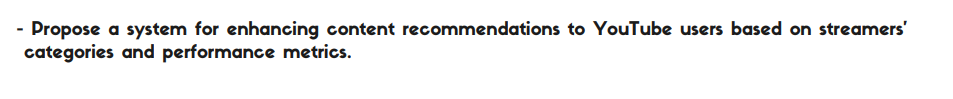

Machine learning model


In [ ]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Assuming 'df' is your DataFrame with columns: visits, subscribers, likes, comments, categories
# Convert category column to numerical representation using one-hot encoding
encoder = OneHotEncoder(sparse=False)
category_encoded = encoder.fit_transform(df[['Categories','Username','Country']])

# Normalize numerical features
scaler = StandardScaler()
numerical_features = scaler.fit_transform(df[['Rank','Visits', 'Suscribers', 'Likes', 'Comments']])

# Combine numerical and categorical features into a single feature matrix
features = np.hstack((numerical_features, category_encoded))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate similarity matrix
similarity_matrix = cosine_similarity(features, features)


In [ ]:
def recommend_videos(target_video_index, similarity_matrix, num_recommendations=5):
    # Get indices of most similar videos (excluding the target video itself)
    similar_video_indices = np.argsort(similarity_matrix[target_video_index])[::-1][1:num_recommendations+1]
    return similar_video_indices

# Example: Recommend videos similar to the first video
target_video_index = 0
recommended_indices = recommend_videos(target_video_index, similarity_matrix)
print("Recommended Video Indices:", recommended_indices)


Recommended Video Indices: [3 2 8 4 6]


In [ ]:
df.head(8)

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Other,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...


In [ ]:
from sklearn.neighbors import NearestNeighbors

# Fit a nearest neighbors model for finding similar items
# Example: Using k-nearest neighbors (adjust 'n_neighbors' as needed)
model = NearestNeighbors(n_neighbors=5, metric='cosine')
model.fit(features)


NearestNeighbors(metric='cosine')